In [1]:
import torch
import seaborn as sns
import pandas as pd

import torch.nn as nn

import sys

sys.path.append('../../models/')

import recnet

import matplotlib.pyplot as plt

import numpy as np

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [70]:
resnet_best = torch.load('resnet_best.pth.tar')
recnet_best = torch.load('recnet_bn_best.pth.tar')
affine_best = torch.load('affine_linear_best.pth.tar')
gru_best = torch.load('gru_best.pth.tar')

In [71]:
resdict = resnet_best['state_dict']
recdict = recnet_best['state_dict']
affdict = affine_best['state_dict']
grudict = gru_best['state_dict']

In [4]:
res_layer1_bn1_weights = np.array([[v.cpu().numpy()[i] for k,v in resdict.items() if 'bn1.weight' in k and 'layer1' in k and 'parent' not in k] for i in range(16)])

res_layer1_bn1_biases = np.array([[v.cpu().numpy()[i] for k,v in resdict.items() if 'bn1.bias' in k and 'layer1' in k and 'parent' not in k] for i in range(16)])

res_layer1_bn2_weights = np.array([[v.cpu().numpy()[i] for k,v in resdict.items() if 'bn2.weight' in k and 'layer1' in k and 'parent' not in k] for i in range(16)])

res_layer1_bn2_biases = np.array([[v.cpu().numpy()[i] for k,v in resdict.items() if 'bn2.bias' in k and 'layer1' in k and 'parent' not in k] for i in range(16)])

res_layer2_bn1_weights = np.array([[v.cpu().numpy()[i] for k,v in resdict.items() if 'bn1.weight' in k and 'layer2' in k and 'parent' not in k] for i in range(32)])

res_layer2_bn1_biases = np.array([[v.cpu().numpy()[i] for k,v in resdict.items() if 'bn1.bias' in k and 'layer2' in k and 'parent' not in k] for i in range(32)])

res_layer2_bn2_weights = np.array([[v.cpu().numpy()[i] for k,v in resdict.items() if 'bn2.weight' in k and 'layer2' in k and 'parent' not in k] for i in range(32)])

res_layer2_bn2_biases = np.array([[v.cpu().numpy()[i] for k,v in resdict.items() if 'bn2.bias' in k and 'layer2' in k and 'parent' not in k] for i in range(32)])

res_layer3_bn1_weights = np.array([[v.cpu().numpy()[i] for k,v in resdict.items() if 'bn1.weight' in k and 'layer3' in k and 'parent' not in k] for i in range(64)])

res_layer3_bn1_biases = np.array([[v.cpu().numpy()[i] for k,v in resdict.items() if 'bn1.bias' in k and 'layer3' in k and 'parent' not in k] for i in range(64)])

res_layer3_bn2_weights = np.array([[v.cpu().numpy()[i] for k,v in resdict.items() if 'bn2.weight' in k and 'layer3' in k and 'parent' not in k] for i in range(64)])

res_layer3_bn2_biases = np.array([[v.cpu().numpy()[i] for k,v in resdict.items() if 'bn2.bias' in k and 'layer3' in k and 'parent' not in k] for i in range(64)])

In [20]:
df = pd.DataFrame()
df = df.append([{'network': 'ResNet-56', 'Block': '16x16', 'parameter type': 'layer 1 weight', 'channel number': i,'timesteps': res_layer1_bn1_weights[i]} for i in range(16)])

df = df.append([{'network': 'ResNet-56', 'Block': '16x16', 'parameter type': 'layer 1 bias', 'channel number': i,'timesteps': res_layer1_bn1_biases[i]} for i in range(16)])

df = df.append([{'network': 'ResNet-56', 'Block': '16x16', 'parameter type': 'layer 2 weight', 'channel number': i,'timesteps': res_layer1_bn2_weights[i]} for i in range(16)])

df = df.append([{'network': 'ResNet-56', 'Block': '16x16', 'parameter type': 'layer 2 bias', 'channel number': i,'timesteps': res_layer1_bn2_biases[i]} for i in range(16)])

df = df.append([{'network': 'ResNet-56', 'Block': '32x32', 'parameter type': 'layer 1 weight', 'channel number': i,'timesteps': res_layer2_bn1_weights[i]} for i in range(32)])

df = df.append([{'network': 'ResNet-56', 'Block': '32x32', 'parameter type': 'layer 1 bias', 'channel number': i,'timesteps': res_layer2_bn1_biases[i]} for i in range(32)])

df = df.append([{'network': 'ResNet-56', 'Block': '32x32', 'parameter type': 'layer 2 weight', 'channel number': i,'timesteps': res_layer2_bn2_weights[i]} for i in range(32)])

df = df.append([{'network': 'ResNet-56', 'Block': '32x32', 'parameter type': 'layer 2 bias', 'channel number': i,'timesteps': res_layer2_bn2_biases[i]} for i in range(32)])

df = df.append([{'network': 'ResNet-56', 'Block': '64x64', 'parameter type': 'layer 1 weight', 'channel number': i,'timesteps': res_layer3_bn1_weights[i]} for i in range(64)])

df = df.append([{'network': 'ResNet-56', 'Block': '64x64', 'parameter type': 'layer 1 bias', 'channel number': i,'timesteps': res_layer3_bn1_biases[i]} for i in range(64)])

df = df.append([{'network': 'ResNet-56', 'Block': '64x64', 'parameter type': 'layer 2 weight', 'channel number': i,'timesteps': res_layer3_bn2_weights[i]} for i in range(64)])

df = df.append([{'network': 'ResNet-56', 'Block': '64x64', 'parameter type': 'layer 2 bias', 'channel number': i,'timesteps': res_layer3_bn2_biases[i]} for i in range(64)])

In [5]:
rec_layer1_bn1_weights = np.array([[v.cpu().numpy()[i] for k,v in recdict.items() if 'batchNorms.0.weight' in k and 'layer1' in k and 'parent' not in k] for i in range(16)])

rec_layer1_bn1_biases = np.array([[v.cpu().numpy()[i] for k,v in recdict.items() if 'batchNorms.0.bias' in k and 'layer1' in k and 'parent' not in k] for i in range(16)])

rec_layer1_bn2_weights = np.array([[v.cpu().numpy()[i] for k,v in recdict.items() if 'batchNorms.1.weight' in k and 'layer1' in k and 'parent' not in k] for i in range(16)])

rec_layer1_bn2_biases = np.array([[v.cpu().numpy()[i] for k,v in recdict.items() if 'batchNorms.1.bias' in k and 'layer1' in k and 'parent' not in k] for i in range(16)])

rec_layer2_bn1_weights = np.array([[v.cpu().numpy()[i] for k,v in recdict.items() if 'batchNorms.0.weight' in k and 'layer2' in k and 'parent' not in k] for i in range(32)])

rec_layer2_bn1_biases = np.array([[v.cpu().numpy()[i] for k,v in recdict.items() if 'batchNorms.0.bias' in k and 'layer2' in k and 'parent' not in k] for i in range(32)])

rec_layer2_bn2_weights = np.array([[v.cpu().numpy()[i] for k,v in recdict.items() if 'batchNorms.1.weight' in k and 'layer2' in k and 'parent' not in k] for i in range(32)])

rec_layer2_bn2_biases = np.array([[v.cpu().numpy()[i] for k,v in recdict.items() if 'batchNorms.1.bias' in k and 'layer2' in k and 'parent' not in k] for i in range(32)])

rec_layer3_bn1_weights = np.array([[v.cpu().numpy()[i] for k,v in recdict.items() if 'batchNorms.0.weight' in k and 'layer3' in k and 'parent' not in k] for i in range(64)])

rec_layer3_bn1_biases = np.array([[v.cpu().numpy()[i] for k,v in recdict.items() if 'batchNorms.0.bias' in k and 'layer3' in k and 'parent' not in k] for i in range(64)])

rec_layer3_bn2_weights = np.array([[v.cpu().numpy()[i] for k,v in recdict.items() if 'batchNorms.1.weight' in k and 'layer3' in k and 'parent' not in k] for i in range(64)])

rec_layer3_bn2_biases = np.array([[v.cpu().numpy()[i] for k,v in recdict.items() if 'batchNorms.1.bias' in k and 'layer3' in k and 'parent' not in k] for i in range(64)])

In [21]:
df = df.append([{'network': 'RecNet', 'Block': '16x16', 'parameter type': 'layer 1 weight', 'channel number': i,'timesteps': rec_layer1_bn1_weights[i]} for i in range(16)] )

df = df.append([{'network': 'RecNet', 'Block': '16x16', 'parameter type': 'layer 1 bias', 'channel number': i,'timesteps': rec_layer1_bn1_biases[i]} for i in range(16)])

df = df.append([{'network': 'RecNet', 'Block': '16x16', 'parameter type': 'layer 2 weight', 'channel number': i,'timesteps': rec_layer1_bn2_weights[i]} for i in range(16)])

df = df.append([{'network': 'RecNet', 'Block': '16x16', 'parameter type': 'layer 2 bias', 'channel number': i,'timesteps': rec_layer1_bn2_biases[i]} for i in range(16)])

df = df.append([{'network': 'RecNet', 'Block': '32x32', 'parameter type': 'layer 1 weight', 'channel number': i,'timesteps': rec_layer2_bn1_weights[i]} for i in range(32)])

df = df.append([{'network': 'RecNet', 'Block': '32x32', 'parameter type': 'layer 1 bias', 'channel number': i,'timesteps': rec_layer2_bn1_biases[i]} for i in range(32)])

df = df.append([{'network': 'RecNet', 'Block': '32x32', 'parameter type': 'layer 2 weight', 'channel number': i,'timesteps': rec_layer2_bn2_weights[i]} for i in range(32)])

df = df.append([{'network': 'RecNet', 'Block': '32x32', 'parameter type': 'layer 2 bias', 'channel number': i,'timesteps': rec_layer2_bn2_biases[i]} for i in range(32)])

df = df.append([{'network': 'RecNet', 'Block': '64x64', 'parameter type': 'layer 1 weight', 'channel number': i,'timesteps': rec_layer3_bn1_weights[i]} for i in range(64)])

df = df.append([{'network': 'RecNet', 'Block': '64x64', 'parameter type': 'layer 1 bias', 'channel number': i,'timesteps': rec_layer3_bn1_biases[i]} for i in range(64)])

df = df.append([{'network': 'RecNet', 'Block': '64x64', 'parameter type': 'layer 2 weight', 'channel number': i,'timesteps': rec_layer3_bn2_weights[i]} for i in range(64)])

df = df.append([{'network': 'RecNet', 'Block': '64x64', 'parameter type': 'layer 2 bias', 'channel number': i,'timesteps': rec_layer3_bn2_biases[i]} for i in range(64)])

In [6]:


best_dict = {k.replace('module.', ''): v for k, v in affdict.items()}

model = recnet.recnet_affine(num_classes=100)

model.load_state_dict(best_dict)

affine_seq_1a = nn.ModuleList([block.affine_a for block in model.layer1])
affine_seq_1b = nn.ModuleList([block.affine_b for block in model.layer1])

affine_seq_2a = nn.ModuleList([block.affine_a for block in model.layer2])
affine_seq_2b = nn.ModuleList([block.affine_b for block in model.layer2])

affine_seq_3a = nn.ModuleList([block.affine_a for block in model.layer3])
affine_seq_3b = nn.ModuleList([block.affine_b for block in model.layer3])

out_list_1a_weight = []
out_list_1a_bias = []
out_list_1b_weight = []
out_list_1b_bias = []
affine_sz = 32
x = torch.zeros(affine_sz)
y = torch.zeros(affine_sz)
for i in range(len(affine_seq_1a)):
    x = affine_seq_1a[i](x)
    y = affine_seq_1b[i](y)
    (x_a, x_b) = x.split(affine_sz//2)
    (y_a, y_b) = y.split(affine_sz//2)
    out_list_1a_weight.append(x_a.detach().cpu())
    out_list_1a_bias.append(x_b.detach().cpu())
    out_list_1b_weight.append(y_a.detach().cpu())
    out_list_1b_bias.append(y_b.detach().cpu())

out_list_2a_weight = []
out_list_2a_bias = []
out_list_2b_weight = []
out_list_2b_bias = []
affine_sz = 64
x = torch.zeros(affine_sz)
y = torch.zeros(affine_sz)
for i in range(len(affine_seq_2a)):
    x = affine_seq_2a[i](x)
    y = affine_seq_2b[i](y)
    (x_a, x_b) = x.split(affine_sz//2)
    (y_a, y_b) = y.split(affine_sz//2)
    out_list_2a_weight.append(x_a.detach().cpu())
    out_list_2a_bias.append(x_b.detach().cpu())
    out_list_2b_weight.append(y_a.detach().cpu())
    out_list_2b_bias.append(y_b.detach().cpu())

out_list_3a_weight = []
out_list_3a_bias = []
out_list_3b_weight = []
out_list_3b_bias = []
affine_sz = 128
x = torch.zeros(affine_sz)
y = torch.zeros(affine_sz)
for i in range(len(affine_seq_3a)):
    x = affine_seq_3a[i](x)
    y = affine_seq_3b[i](y)
    (x_a, x_b) = x.split(affine_sz//2)
    (y_a, y_b) = y.split(affine_sz//2)
    out_list_3a_weight.append(x_a.detach().cpu())
    out_list_3a_bias.append(x_b.detach().cpu())
    out_list_3b_weight.append(y_a.detach().cpu())
    out_list_3b_bias.append(y_b.detach().cpu())

In [7]:
aff_layer1_bn1_weights = torch.stack(out_list_1a_weight, dim=1).numpy()

aff_layer1_bn1_biases = torch.stack(out_list_1a_bias, dim=1).numpy()

aff_layer1_bn2_weights = torch.stack(out_list_1b_weight, dim=1).numpy()

aff_layer1_bn2_biases = torch.stack(out_list_1b_bias, dim=1).numpy()

aff_layer2_bn1_weights = torch.stack(out_list_2a_weight, dim=1).numpy()

aff_layer2_bn1_biases = torch.stack(out_list_2a_bias, dim=1).numpy()

aff_layer2_bn2_weights = torch.stack(out_list_2b_weight, dim=1).numpy()

aff_layer2_bn2_biases = torch.stack(out_list_2b_bias, dim=1).numpy()

aff_layer3_bn1_weights = torch.stack(out_list_3a_weight, dim=1).numpy()

aff_layer3_bn1_biases = torch.stack(out_list_3a_bias, dim=1).numpy()

aff_layer3_bn2_weights = torch.stack(out_list_3b_weight, dim=1).numpy()

aff_layer3_bn2_biases = torch.stack(out_list_3b_bias, dim=1).numpy()

In [22]:
df = df.append([{'network': 'RecNet (Linearly-trained Affine)', 'Block': '16x16', 'parameter type': 'layer 1 weight', 'channel number': i,'timesteps': aff_layer1_bn1_weights[i]} for i in range(16)] )

df = df.append([{'network': 'RecNet (Linearly-trained Affine)', 'Block': '16x16', 'parameter type': 'layer 1 bias', 'channel number': i,'timesteps': aff_layer1_bn1_biases[i]} for i in range(16)])

df = df.append([{'network': 'RecNet (Linearly-trained Affine)', 'Block': '16x16', 'parameter type': 'layer 2 weight', 'channel number': i,'timesteps': aff_layer1_bn2_weights[i]} for i in range(16)])

df = df.append([{'network': 'RecNet (Linearly-trained Affine)', 'Block': '16x16', 'parameter type': 'layer 2 bias', 'channel number': i,'timesteps': aff_layer1_bn2_biases[i]} for i in range(16)])

df = df.append([{'network': 'RecNet (Linearly-trained Affine)', 'Block': '32x32', 'parameter type': 'layer 1 weight', 'channel number': i,'timesteps': aff_layer2_bn1_weights[i]} for i in range(32)])

df = df.append([{'network': 'RecNet (Linearly-trained Affine)', 'Block': '32x32', 'parameter type': 'layer 1 bias', 'channel number': i,'timesteps': aff_layer2_bn1_biases[i]} for i in range(32)])

df = df.append([{'network': 'RecNet (Linearly-trained Affine)', 'Block': '32x32', 'parameter type': 'layer 2 weight', 'channel number': i,'timesteps': aff_layer2_bn2_weights[i]} for i in range(32)])

df = df.append([{'network': 'RecNet (Linearly-trained Affine)', 'Block': '32x32', 'parameter type': 'layer 2 bias', 'channel number': i,'timesteps': aff_layer2_bn2_biases[i]} for i in range(32)])

df = df.append([{'network': 'RecNet (Linearly-trained Affine)', 'Block': '64x64', 'parameter type': 'layer 1 weight', 'channel number': i,'timesteps': aff_layer3_bn1_weights[i]} for i in range(64)])

df = df.append([{'network': 'RecNet (Linearly-trained Affine)', 'Block': '64x64', 'parameter type': 'layer 1 bias', 'channel number': i,'timesteps': aff_layer3_bn1_biases[i]} for i in range(64)])

df = df.append([{'network': 'RecNet (Linearly-trained Affine)', 'Block': '64x64', 'parameter type': 'layer 2 weight', 'channel number': i,'timesteps': aff_layer3_bn2_weights[i]} for i in range(64)])

df = df.append([{'network': 'RecNet (Linearly-trained Affine)', 'Block': '64x64', 'parameter type': 'layer 2 bias', 'channel number': i,'timesteps': aff_layer3_bn2_biases[i]} for i in range(64)])

In [23]:
df

,Block,channel number,network,parameter type,timesteps
0,16x16,0,ResNet-56,layer 1 weight,"[0.45510244, 0.47551018, 0.37914094, 0.6877506..."
1,16x16,1,ResNet-56,layer 1 weight,"[0.37586355, 0.29713053, 0.5683077, 0.60091764..."
2,16x16,2,ResNet-56,layer 1 weight,"[0.38158935, 0.8393216, 0.7488, 0.5423241, 0.6..."
3,16x16,3,ResNet-56,layer 1 weight,"[0.39737675, 0.6311694, 0.22092576, 0.62138766..."
4,16x16,4,ResNet-56,layer 1 weight,"[0.62274593, 0.56549966, 0.53249425, 0.5376533..."
5,16x16,5,ResNet-56,layer 1 weight,"[0.38188007, 0.2593487, 0.4003764, 0.4337934, ..."
6,16x16,6,ResNet-56,layer 1 weight,"[0.6501671, 0.42298412, 0.4704521, 0.5557524, ..."
7,16x16,7,ResNet-56,layer 1 weight,"[0.39315778, 0.6493545, 0.6044468, 0.48703453,..."
8,16x16,8,ResNet-56,layer 1 weight,"[0.6241448, 0.6026409, 0.8462949, 0.7182252, 0..."
9,16x16,9,ResNet-56,layer 1 weight,"[0.7577883, 0.007974523, 0.49705538, 0.8432127..."


In [72]:
affine_model = recnet.recnet_affine_gru()

affine_model.load_state_dict(grudict, strict=False)

affine_seq_1a = nn.ModuleList([block.affine_a for block in affine_model.layer1])
affine_seq_1b = nn.ModuleList([block.affine_b for block in affine_model.layer1])

affine_seq_2a = nn.ModuleList([block.affine_a for block in affine_model.layer2])
affine_seq_2b = nn.ModuleList([block.affine_b for block in affine_model.layer2])

affine_seq_3a = nn.ModuleList([block.affine_a for block in affine_model.layer3])
affine_seq_3b = nn.ModuleList([block.affine_b for block in affine_model.layer3])

out_list_1a_weight = []
out_list_1a_bias = []
out_list_1b_weight = []
out_list_1b_bias = []
affine_sz = 32
x = torch.zeros(affine_sz)
y = torch.zeros(affine_sz)
for i in range(len(affine_seq_1a)):
    (x,_) = affine_seq_1a[i](x.view(1,1,-1))
    (y,_) = affine_seq_1b[i](y.view(1,1,-1))
    x = x.squeeze()
    y = y.squeeze()
    (x_a, x_b) = x.split(affine_sz//2)
    (y_a, y_b) = y.split(affine_sz//2)
    out_list_1a_weight.append(x_a.detach().cpu())
    out_list_1a_bias.append(x_b.detach().cpu())
    out_list_1b_weight.append(y_a.detach().cpu())
    out_list_1b_bias.append(y_b.detach().cpu())

out_list_2a_weight = []
out_list_2a_bias = []
out_list_2b_weight = []
out_list_2b_bias = []
affine_sz = 64
x = torch.zeros(affine_sz)
y = torch.zeros(affine_sz)
for i in range(len(affine_seq_2a)):
    (x,_) = affine_seq_2a[i](x.view(1,1,-1))
    (y,_) = affine_seq_2b[i](y.view(1,1,-1))
    x = x.squeeze()
    y = y.squeeze()
    (x_a, x_b) = x.split(affine_sz//2)
    (y_a, y_b) = y.split(affine_sz//2)
    out_list_2a_weight.append(x_a.detach().cpu())
    out_list_2a_bias.append(x_b.detach().cpu())
    out_list_2b_weight.append(y_a.detach().cpu())
    out_list_2b_bias.append(y_b.detach().cpu())

out_list_3a_weight = []
out_list_3a_bias = []
out_list_3b_weight = []
out_list_3b_bias = []
affine_sz = 128
x = torch.zeros(affine_sz)
y = torch.zeros(affine_sz)
for i in range(len(affine_seq_3a)):
    (x,_) = affine_seq_3a[i](x.view(1,1,-1))
    (y,_) = affine_seq_3b[i](y.view(1,1,-1))
    x = x.squeeze()
    y = y.squeeze()
    (x_a, x_b) = x.split(affine_sz//2)
    (y_a, y_b) = y.split(affine_sz//2)
    out_list_3a_weight.append(x_a.detach().cpu())
    out_list_3a_bias.append(x_b.detach().cpu())
    out_list_3b_weight.append(y_a.detach().cpu())
    out_list_3b_bias.append(y_b.detach().cpu())

In [73]:
gru_layer1_bn1_weights = torch.stack(out_list_1a_weight, dim=1).numpy()

gru_layer1_bn1_biases = torch.stack(out_list_1a_bias, dim=1).numpy()

gru_layer1_bn2_weights = torch.stack(out_list_1b_weight, dim=1).numpy()

gru_layer1_bn2_biases = torch.stack(out_list_1b_bias, dim=1).numpy()

gru_layer2_bn1_weights = torch.stack(out_list_2a_weight, dim=1).numpy()

gru_layer2_bn1_biases = torch.stack(out_list_2a_bias, dim=1).numpy()

gru_layer2_bn2_weights = torch.stack(out_list_2b_weight, dim=1).numpy()

gru_layer2_bn2_biases = torch.stack(out_list_2b_bias, dim=1).numpy()

gru_layer3_bn1_weights = torch.stack(out_list_3a_weight, dim=1).numpy()

gru_layer3_bn1_biases = torch.stack(out_list_3a_bias, dim=1).numpy()

gru_layer3_bn2_weights = torch.stack(out_list_3b_weight, dim=1).numpy()

gru_layer3_bn2_biases = torch.stack(out_list_3b_bias, dim=1).numpy()

In [74]:
df = df.append([{'network': 'RecNet (GRU-trained Affine)', 'Block': '16x16', 'parameter type': 'layer 1 weight', 'channel number': i,'timesteps': gru_layer1_bn1_weights[i]} for i in range(16)] )

df = df.append([{'network': 'RecNet (GRU-trained Affine)', 'Block': '16x16', 'parameter type': 'layer 1 bias', 'channel number': i,'timesteps': gru_layer1_bn1_biases[i]} for i in range(16)])

df = df.append([{'network': 'RecNet (GRU-trained Affine)', 'Block': '16x16', 'parameter type': 'layer 2 weight', 'channel number': i,'timesteps': gru_layer1_bn2_weights[i]} for i in range(16)])

df = df.append([{'network': 'RecNet (GRU-trained Affine)', 'Block': '16x16', 'parameter type': 'layer 2 bias', 'channel number': i,'timesteps': gru_layer1_bn2_biases[i]} for i in range(16)])

df = df.append([{'network': 'RecNet (GRU-trained Affine)', 'Block': '32x32', 'parameter type': 'layer 1 weight', 'channel number': i,'timesteps': gru_layer2_bn1_weights[i]} for i in range(32)])

df = df.append([{'network': 'RecNet (GRU-trained Affine)', 'Block': '32x32', 'parameter type': 'layer 1 bias', 'channel number': i,'timesteps': gru_layer2_bn1_biases[i]} for i in range(32)])

df = df.append([{'network': 'RecNet (GRU-trained Affine)', 'Block': '32x32', 'parameter type': 'layer 2 weight', 'channel number': i,'timesteps': gru_layer2_bn2_weights[i]} for i in range(32)])

df = df.append([{'network': 'RecNet (GRU-trained Affine)', 'Block': '32x32', 'parameter type': 'layer 2 bias', 'channel number': i,'timesteps': gru_layer2_bn2_biases[i]} for i in range(32)])

df = df.append([{'network': 'RecNet (GRU-trained Affine)', 'Block': '64x64', 'parameter type': 'layer 1 weight', 'channel number': i,'timesteps': gru_layer3_bn1_weights[i]} for i in range(64)])

df = df.append([{'network': 'RecNet (GRU-trained Affine)', 'Block': '64x64', 'parameter type': 'layer 1 bias', 'channel number': i,'timesteps': gru_layer3_bn1_biases[i]} for i in range(64)])

df = df.append([{'network': 'RecNet (GRU-trained Affine)', 'Block': '64x64', 'parameter type': 'layer 2 weight', 'channel number': i,'timesteps': gru_layer3_bn2_weights[i]} for i in range(64)])

df = df.append([{'network': 'RecNet (GRU-trained Affine)', 'Block': '64x64', 'parameter type': 'layer 2 bias', 'channel number': i,'timesteps': gru_layer3_bn2_biases[i]} for i in range(64)])

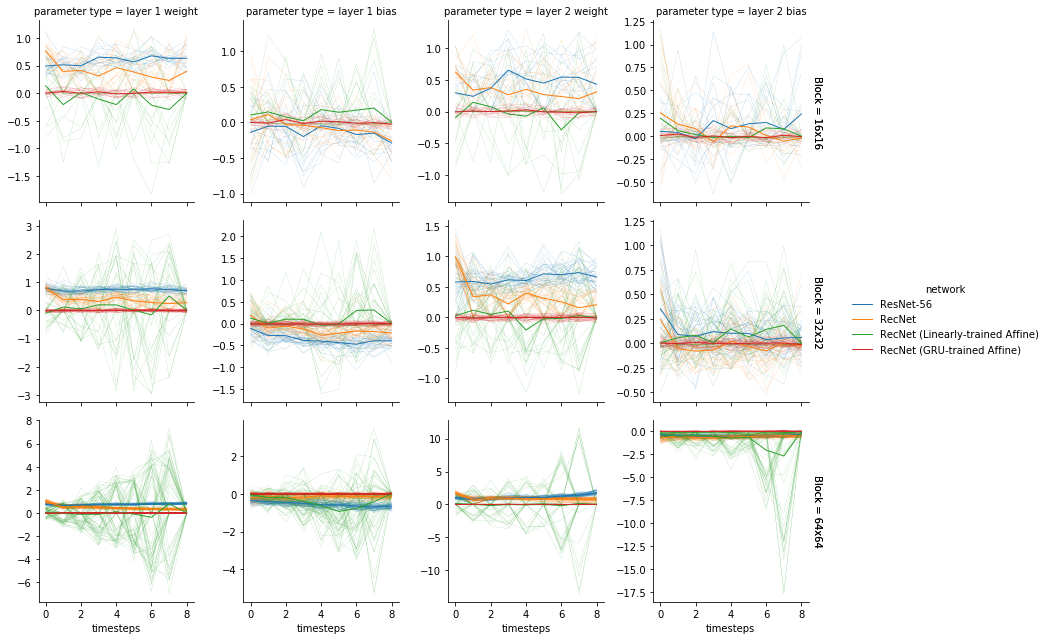

In [75]:
def plot_trace(tr, **kwargs):
    ax = plt.gca()
    ax.plot(np.vstack(tr).T, **kwargs)

def plot_mean(tr, **kwargs):
    ax = plt.gca()
    ax.plot(np.vstack(tr).mean(0).T, **kwargs)
g=  sns.FacetGrid(df, row='Block', col='parameter type', hue='network', margin_titles=True, sharey=False)

g.map(plot_trace, 'timesteps', linestyle='-',lw=0.1)
g.map(plot_mean, 'timesteps', linestyle='-',lw=1)
g = g.add_legend()
g.savefig('affines_vs_timestep_allnetworks_sharey=off.png')

# Mean Line

In [24]:
df_mean = pd.DataFrame()
df_mean = df_mean.append({'network': 'ResNet-56', 'Block': '16x16', 'parameter type': 'layer 1 weight','timesteps': res_layer1_bn1_weights.mean(0)}, ignore_index=True)

df_mean = df_mean.append({'network': 'ResNet-56', 'Block': '16x16', 'parameter type': 'layer 1 bias', 'timesteps': res_layer1_bn1_biases.mean(0)}, ignore_index=True)

df_mean = df_mean.append({'network': 'ResNet-56', 'Block': '16x16', 'parameter type': 'layer 2 weight', 'timesteps': res_layer1_bn2_weights.mean(0)}, ignore_index=True)

df_mean = df_mean.append({'network': 'ResNet-56', 'Block': '16x16', 'parameter type': 'layer 2 bias', 'timesteps': res_layer1_bn2_biases.mean(0)}, ignore_index=True)

df_mean = df_mean.append({'network': 'ResNet-56', 'Block': '32x32', 'parameter type': 'layer 1 weight', 'timesteps': res_layer2_bn1_weights.mean(0)}, ignore_index=True)

df_mean = df_mean.append({'network': 'ResNet-56', 'Block': '32x32', 'parameter type': 'layer 1 bias', 'timesteps': res_layer2_bn1_biases.mean(0)}, ignore_index=True)

df_mean = df_mean.append({'network': 'ResNet-56', 'Block': '32x32', 'parameter type': 'layer 2 weight', 'timesteps': res_layer2_bn2_weights.mean(0)}, ignore_index=True)

df_mean = df_mean.append({'network': 'ResNet-56', 'Block': '32x32', 'parameter type': 'layer 2 bias', 'timesteps': res_layer2_bn2_biases.mean(0)}, ignore_index=True)

df_mean = df_mean.append({'network': 'ResNet-56', 'Block': '64x64', 'parameter type': 'layer 1 weight', 'timesteps': res_layer3_bn1_weights.mean(0)}, ignore_index=True)

df_mean = df_mean.append({'network': 'ResNet-56', 'Block': '64x64', 'parameter type': 'layer 1 bias','timesteps': res_layer3_bn1_biases.mean(0)}, ignore_index=True)

df_mean = df_mean.append({'network': 'ResNet-56', 'Block': '64x64', 'parameter type': 'layer 2 weight', 'timesteps': res_layer3_bn2_weights.mean(0)}, ignore_index=True)

df_mean = df_mean.append({'network': 'ResNet-56', 'Block': '64x64', 'parameter type': 'layer 2 bias', 'timesteps': res_layer3_bn2_biases.mean(0)}, ignore_index=True)

In [30]:
df

,Block,channel number,network,parameter type,timesteps
0,16x16,0,ResNet-56,layer 1 weight,"[0.45510244, 0.47551018, 0.37914094, 0.6877506..."
1,16x16,1,ResNet-56,layer 1 weight,"[0.37586355, 0.29713053, 0.5683077, 0.60091764..."
2,16x16,2,ResNet-56,layer 1 weight,"[0.38158935, 0.8393216, 0.7488, 0.5423241, 0.6..."
3,16x16,3,ResNet-56,layer 1 weight,"[0.39737675, 0.6311694, 0.22092576, 0.62138766..."
4,16x16,4,ResNet-56,layer 1 weight,"[0.62274593, 0.56549966, 0.53249425, 0.5376533..."
5,16x16,5,ResNet-56,layer 1 weight,"[0.38188007, 0.2593487, 0.4003764, 0.4337934, ..."
6,16x16,6,ResNet-56,layer 1 weight,"[0.6501671, 0.42298412, 0.4704521, 0.5557524, ..."
7,16x16,7,ResNet-56,layer 1 weight,"[0.39315778, 0.6493545, 0.6044468, 0.48703453,..."
8,16x16,8,ResNet-56,layer 1 weight,"[0.6241448, 0.6026409, 0.8462949, 0.7182252, 0..."
9,16x16,9,ResNet-56,layer 1 weight,"[0.7577883, 0.007974523, 0.49705538, 0.8432127..."


In [27]:
df_mean = df_mean.append({'network': 'RecNet', 'Block': '16x16', 'parameter type': 'layer 1 weight','timesteps': rec_layer1_bn1_weights.mean(0)},ignore_index=True)

df_mean = df_mean.append({'network': 'RecNet', 'Block': '16x16', 'parameter type': 'layer 1 bias', 'timesteps': rec_layer1_bn1_biases.mean(0)},ignore_index=True)

df_mean = df_mean.append({'network': 'RecNet', 'Block': '16x16', 'parameter type': 'layer 2 weight','timesteps': rec_layer1_bn2_weights.mean(0)},ignore_index=True)

df_mean = df_mean.append({'network': 'RecNet', 'Block': '16x16', 'parameter type': 'layer 2 bias', 'timesteps': rec_layer1_bn2_biases.mean(0)}, ignore_index=True)

df_mean = df_mean.append({'network': 'RecNet', 'Block': '32x32', 'parameter type': 'layer 1 weight','timesteps': rec_layer2_bn1_weights.mean(0)},ignore_index=True)

df_mean = df_mean.append({'network': 'RecNet', 'Block': '32x32', 'parameter type': 'layer 1 bias', 'timesteps': rec_layer2_bn1_biases.mean(0)}, ignore_index=True)

df_mean = df_mean.append({'network': 'RecNet', 'Block': '32x32', 'parameter type': 'layer 2 weight','timesteps': rec_layer2_bn2_weights.mean(0)}, ignore_index=True)

df_mean = df_mean.append({'network': 'RecNet', 'Block': '32x32', 'parameter type': 'layer 2 bias', 'timesteps': rec_layer2_bn2_biases.mean(0)}, ignore_index=True)

df_mean = df_mean.append({'network': 'RecNet', 'Block': '64x64', 'parameter type': 'layer 1 weight','timesteps': rec_layer3_bn1_weights.mean(0)}, ignore_index=True)

df_mean = df_mean.append({'network': 'RecNet', 'Block': '64x64', 'parameter type': 'layer 1 bias','timesteps': rec_layer3_bn1_biases.mean(0)}, ignore_index=True)

df_mean = df_mean.append({'network': 'RecNet', 'Block': '64x64', 'parameter type': 'layer 2 weight', 'timesteps': rec_layer3_bn2_weights.mean(0)}, ignore_index=True)

df_mean = df_mean.append({'network': 'RecNet', 'Block': '64x64', 'parameter type': 'layer 2 bias', 'timesteps': rec_layer3_bn2_biases.mean(0)}, ignore_index=True)
                

In [28]:
df_mean = df_mean.append({'network': 'RecNet (Linearly-trained Affine)', 'Block': '16x16', 'parameter type': 'layer 1 weight', 'timesteps': aff_layer1_bn1_weights.mean(0)}, ignore_index=True)

df_mean = df_mean.append({'network': 'RecNet (Linearly-trained Affine)', 'Block': '16x16', 'parameter type': 'layer 1 bias', 'timesteps': aff_layer1_bn1_biases.mean(0)}, ignore_index=True)

df_mean = df_mean.append({'network': 'RecNet (Linearly-trained Affine)', 'Block': '16x16', 'parameter type': 'layer 2 weight', 'timesteps': aff_layer1_bn2_weights.mean(0)}, ignore_index=True)

df_mean = df_mean.append({'network': 'RecNet (Linearly-trained Affine)', 'Block': '16x16', 'parameter type': 'layer 2 bias', 'timesteps': aff_layer1_bn2_biases.mean(0)}, ignore_index=True)

df_mean = df_mean.append({'network': 'RecNet (Linearly-trained Affine)', 'Block': '32x32', 'parameter type': 'layer 1 weight', 'timesteps': aff_layer2_bn1_weights.mean(0)}, ignore_index=True)

df_mean = df_mean.append({'network': 'RecNet (Linearly-trained Affine)', 'Block': '32x32', 'parameter type': 'layer 1 bias', 'timesteps': aff_layer2_bn1_biases.mean(0)}, ignore_index=True)

df_mean = df_mean.append({'network': 'RecNet (Linearly-trained Affine)', 'Block': '32x32', 'parameter type': 'layer 2 weight', 'timesteps': aff_layer2_bn2_weights.mean(0)}, ignore_index=True)

df_mean = df_mean.append({'network': 'RecNet (Linearly-trained Affine)', 'Block': '32x32', 'parameter type': 'layer 2 bias', 'timesteps': aff_layer2_bn2_biases.mean(0)}, ignore_index=True)

df_mean = df_mean.append({'network': 'RecNet (Linearly-trained Affine)', 'Block': '64x64', 'parameter type': 'layer 1 weight', 'timesteps': aff_layer3_bn1_weights.mean(0)}, ignore_index=True)

df_mean = df_mean.append({'network': 'RecNet (Linearly-trained Affine)', 'Block': '64x64', 'parameter type': 'layer 1 bias', 'timesteps': aff_layer3_bn1_biases.mean(0)}, ignore_index=True)

df_mean = df_mean.append({'network': 'RecNet (Linearly-trained Affine)', 'Block': '64x64', 'parameter type': 'layer 2 weight', 'timesteps': aff_layer3_bn2_weights.mean(0)}, ignore_index=True)

df_mean = df_mean.append({'network': 'RecNet (Linearly-trained Affine)', 'Block': '64x64', 'parameter type': 'layer 2 bias', 'timesteps': aff_layer3_bn2_biases.mean(0)}, ignore_index=True)



In [291]:
df = df.append({'network': 'RecNet (GRU-trained Affine)', 'Block': '16x16', 'parameter type': 'layer 1 weight', 'timesteps': gru_layer1_bn1_weights.mean(0)}, ignore_index=True)

df = df.append({'network': 'RecNet (GRU-trained Affine)', 'Block': '16x16', 'parameter type': 'layer 1 bias', 'timesteps':gru_layer1_bn1_biases.mean(0)}, ignore_index=True)

df = df.append({'network': 'RecNet (GRU-trained Affine)', 'Block': '16x16', 'parameter type': 'layer 2 weight', 'timesteps': gru_layer1_bn2_weights.mean(0)}, ignore_index=True)

df = df.append({'network': 'RecNet (GRU-trained Affine)', 'Block': '16x16', 'parameter type': 'layer 2 bias', 'timesteps': gru_layer1_bn2_biases.mean(0)}, ignore_index=True)

df = df.append({'network': 'RecNet (GRU-trained Affine)', 'Block': '32x32', 'parameter type': 'layer 1 weight', 'timesteps': gru_layer2_bn1_weights.mean(0)}, ignore_index=True)

df = df.append({'network': 'RecNet (GRU-trained Affine)', 'Block': '32x32', 'parameter type': 'layer 1 bias', 'timesteps': gru_layer2_bn1_biases.mean(0)}, ignore_index=True)

df = df.append({'network': 'RecNet (GRU-trained Affine)', 'Block': '32x32', 'parameter type': 'layer 2 weight', 'timesteps': gru_layer2_bn2_weights.mean(0)}, ignore_index=True)

df = df.append({'network': 'RecNet (GRU-trained Affine)', 'Block': '32x32', 'parameter type': 'layer 2 bias', 'timesteps': gru_layer2_bn2_biases.mean(0)}, ignore_index=True)

df = df.append({'network': 'RecNet (GRU-trained Affine)', 'Block': '64x64', 'parameter type': 'layer 1 weight', 'timesteps': gru_layer3_bn1_weights.mean(0)}, ignore_index=True)

df = df.append({'network': 'RecNet (GRU-trained Affine)', 'Block': '64x64', 'parameter type': 'layer 1 bias', 'timesteps': gru_layer3_bn1_biases.mean(0)}, ignore_index=True)

df = df.append({'network': 'RecNet (GRU-trained Affine)', 'Block': '64x64', 'parameter type': 'layer 2 weight', 'timesteps': gru_layer3_bn2_weights.mean(0)}, ignore_index=True)

df = df.append({'network': 'RecNet (GRU-trained Affine)', 'Block': '64x64', 'parameter type': 'layer 2 bias', 'timesteps': gru_layer3_bn2_biases.mean(0)}, ignore_index=True)



In [292]:
df

,Block,network,parameter type,timesteps
0,16x16,ResNet-56,layer 1 weight,"[0.49312407, 0.5138644, 0.49700284, 0.653701, ..."
1,16x16,ResNet-56,layer 1 bias,"[-0.1396642, -0.051496815, -0.056413233, -0.19..."
2,16x16,ResNet-56,layer 2 weight,"[0.29584587, 0.24049425, 0.3682463, 0.65338784..."
3,16x16,ResNet-56,layer 2 bias,"[0.05381673, 0.04080053, -0.028236892, 0.17055..."
4,32x32,ResNet-56,layer 1 weight,"[0.78990597, 0.68857527, 0.6888686, 0.7424547,..."
5,32x32,ResNet-56,layer 1 bias,"[-0.11031845, -0.26977897, -0.2741772, -0.3855..."
6,32x32,ResNet-56,layer 2 weight,"[0.58201754, 0.58989793, 0.5470724, 0.6164243,..."
7,32x32,ResNet-56,layer 2 bias,"[0.35395825, 0.089954965, 0.07091369, 0.118363..."
8,64x64,ResNet-56,layer 1 weight,"[0.768915, 0.6400665, 0.69287384, 0.7376846, 0..."
9,64x64,ResNet-56,layer 1 bias,"[-0.35241595, -0.41119015, -0.45640153, -0.506..."


In [56]:
np.vstack(rec_layer1_bn1_weights).mean(0).T

array([0.76471275, 0.39371064, 0.41419572, 0.31188035, 0.4623327 ,
       0.38355517, 0.2925067 , 0.23082986, 0.39934593], dtype=float32)